# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?



    Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    
    Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import shapiro
sns.set()

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
np.random.seed(42)

In [5]:
def bootstrap_replicates_1d(data, func):
    """takes and input data array in 1d, and returns the 
        desired paramter via supplied function, np.mean, np.median"""
    return func(np.random.choice(data, len(data)))

In [6]:
def draw_bs_reps(data, func, size):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicates_1d(data, func)
    return bs_replicates

In [9]:
mue=np.mean(df.temperature)
sigma=np.std(df.temperature)
print(f'mue: {mue}')
print(f'sigma: {sigma}')

mue: 98.24923076923078
sigma: 0.7303577789050377


In [10]:
sample_normal=np.random.normal(mue, sigma, size=100_000)

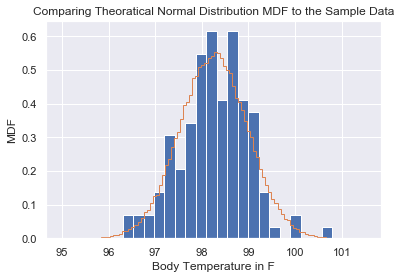

In [11]:
plt.hist(df.temperature, density=True, bins=20)
plt.hist(sample_normal, density=True, histtype='step', bins=100)
plt.xlabel('Body Temperature in F')
plt.ylabel('MDF')
plt.title('Comparing Theoratical Normal Distribution MDF to the Sample Data')
plt.show()

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y

In [13]:
x_theor, y_theor = ecdf(sample_normal)

In [14]:
x, y = ecdf(df.temperature)

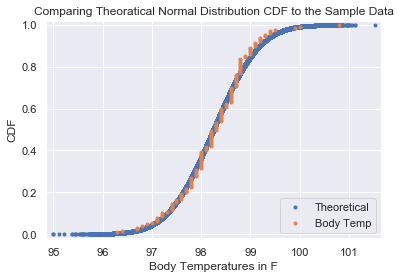

In [15]:
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.legend(('Theoretical', 'Body Temp'), loc='lower right')
plt.xlabel('Body Temperatures in F')
plt.ylabel('CDF')
plt.title('Comparing Theoratical Normal Distribution CDF to the Sample Data')
plt.margins(0.02)
plt.show()

Use scipy to perform Normal test

H0: sample has a Normal distribution
HA: sample does not have a Normal distribution

In [16]:
stat, p = normaltest(df.temperature)

In [17]:
alpha = 0.05

In [18]:
(stat, p)

(2.703801433319203, 0.2587479863488254)

In [19]:
if p>alpha: 
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample looks normal (fail to reject H0)


In [20]:
stat, p = shapiro(df.temperature)

In [21]:
(stat,p)

(0.9865770936012268, 0.233174666762352)

In [22]:
if p>alpha: 
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Sample looks normal (fail to reject H0)


## 2. Is the sample size large? Are the observations independent?



<ul>
    <li>Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
</ul>

We can consider sample above 30 is large enough to apply CLT. Since the sample size is 130 for this data set, we can assume the sample size to be large. Additionally since the documentation states that the data are random, we can assume the observations are independent

## 3. Is the true population mean really 98.6 degrees F?

<ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
</ul>

I would use a one-sample test since we only have one dataset that is going to be compared to a mean value of a population. Additionally, either z or t statistic can be used as they will be the same given that the sample size, n >30.

H0=98.6 is the true population mean
HA=98.6 is not the true population mean

<li>t=(sample_mean - pop_mean)/(std_sample / sqrt(sample_size))
<li>z=(sample_mean - pop_mean)/(std_pop / sqrt(sample_size)): since we don't know std_pop we can use the sample std if the sample size is large, ie n > 30
<li>as sample size gets larger, z and t statistics become the same

In [23]:
true_mue = 98.6

Since we only have the mean value of 98.6F from the total population data, we can simulate the population dataset by first shifting the given data sample by the difference in mean values.

In [24]:
body_temp_shifted = df.temperature - mue + true_mue

In [25]:
x, y = ecdf(df.temperature)
x_new, y_new = ecdf(body_temp_shifted)

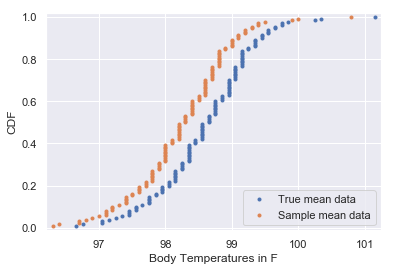

In [26]:
_ = plt.plot(x_new, y_new, marker='.', linestyle='none')
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.legend(('True mean data', 'Sample mean data'), loc='lower right')
plt.xlabel('Body Temperatures in F')
plt.ylabel('CDF')
plt.margins(0.02)
plt.show()

We can then bootstrap 10,000 replicates from the shifted dataset which reflects having a mean of 98.6F

In [27]:
def diff_from_true(data, true_mue=98.6):
    return np.mean(data) - true_mue

In [28]:
diff_obs = diff_from_true(df.temperature)

In [29]:
bs_replicates = draw_bs_reps(body_temp_shifted, diff_from_true, 10_000)

In [30]:
t_stat=(mue - 98.6)/(sigma / np.sqrt(len(df.temperature)))
#since n>30 we can use std of sample to approximate std of pupulation
z_stat=(mue - 98.6)/(sigma / np.sqrt(len(df.temperature)))
print(f't-stat: {t_stat}')
print(f'z-stat: {z_stat}')

t-stat: -5.475925202078116
z-stat: -5.475925202078116


In [31]:
p_value = np.sum(bs_replicates <= diff_obs) / 10_000
p_value

0.0

Since p-value is 0, there are zero times in which the sample mean exceeded the difference between the true mean and the sample mean. From this, we must reject the null hypothesis that 98.6 is the true mean.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 



<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
</ul>

Perform the same analysis as in #3 but with a smaller sample of 10. Population mean is still 98.6F

Use a one-sample test since we only have one dataset that is going to be compared to a mean value of a population. Perform a z-statistic and t-statistic test on the new sample size of 10 to show the differences in results.

<li>t=(sample_mean - pop_mean)/(std_sample / sqrt(sample_size))
<li>z=(sample_mean - pop_mean)/(std_pop / sqrt(sample_size)): since we don't know std_pop we can use the sample std and show that the results will be different between the two test given that the sample size is now less than30 (10)

In [32]:
#draw a random sample of 10 from the existing sample
n_10_sample = np.random.choice(df.temperature, size=10)

In [33]:
#calculate the sample mean and sample standard diviation
sample_mue=np.mean(n_10_sample)
sample_sigma=np.std(n_10_sample)
print(f'Sample mue: {sample_mue}')
print(f'Sample sigma: {sample_sigma}')

Sample mue: 98.52999999999999
Sample sigma: 1.1480853626799696


In [34]:
print(f'True mean: {true_mue}')

True mean: 98.6


In [35]:
sample_10_shifted = n_10_sample - mue + true_mue

In [36]:
diff_obs_10 = diff_from_true(n_10_sample)

In [37]:
bs_replicates = draw_bs_reps(sample_10_shifted, diff_from_true, 10_000)

In [38]:
t_stat=(sample_mue - 98.6)/(sample_sigma / np.sqrt(len(n_10_sample)))
#since n>30 we can use std of sample to approximate std of pupulation
z_stat=(sample_mue - 98.6)/(sigma / np.sqrt(len(n_10_sample)))
print(f't-stat: {t_stat}')
print(f'z-stat: {z_stat}')

t-stat: -0.19280747181994531
z-stat: -0.303083560694972


In [39]:
p_value = np.sum(bs_replicates <= diff_obs_10) / 10_000
p_value

0.1659

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

<ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
</ul>

In [40]:
#Margin of error = critical value x standard error
#We'll use z-score corresponding to 95% confidence interval for the critical value
critical_z = 1.96
#std_error = sigma/np.sqrt(len(df.temperature))
std_error = sigma/np.sqrt(1)
MOE = critical_z*std_error
MOE

1.431501246653874

In [41]:
confidence_interval=np.percentile(df.temperature, [2.5, 97.5])
confidence_interval

array([96.7225, 99.4775])

In [42]:
prediction_interval=[mue-MOE, mue+MOE]
prediction_interval

[96.8177295225769, 99.68073201588466]

Should we consider a temperature too low abnormal or just too high? It is generally understood that a high temperature is dangerous for keeping vital organs cool and functioning properly. And although, a low body temperature is also dangerous in case of hypothermia it is not generally thought of as common scenario. For this case, it is better to focus on the high temperature, or fever. The next question to ask is how high is too high? Should we consider 99.9 percentile a fever? Dangerous temperatures are considerably higher than what we have in the dataset (103-105F), as such we will consider the top end of our distribution as an abnormally high temperature.

In [43]:
fever_99 = np.percentile(df.temperature, [99.9])
print(f"Abnormally high temperature (fever): {fever_99}")

Abnormally high temperature (fever): [100.6968]


In [44]:
def find_high_percentile(data):
    fever = np.percentile(data, [99.9])
    return fever

In [45]:
bs_replicates = draw_bs_reps(df.temperature, find_high_percentile, 10_000)

In [46]:
p_value = np.sum(bs_replicates <= fever_99) / 10_000
p_value

0.736

In [47]:
np.mean(bs_replicates)

100.42487621

Replicating our sampling 10,000 times, we can see that average high temperature of 10,000 samples is 100.4F (38C), which is a general public acceptance. 

##  6. Is there a significant difference between males and females in normal temperature?


<ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

I will explore two methods for solving this problem: permutation sample and a two-sample test on the means.

In [48]:
male=df[df.gender=='M']
female=df[df.gender=='F']

In [49]:
male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [50]:
female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


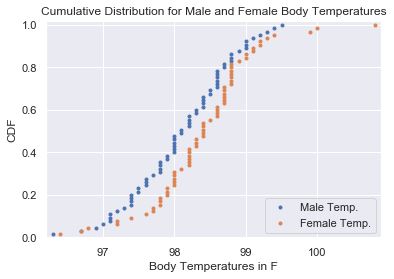

In [51]:
x_male, y_male = ecdf(male.temperature)
x_female, y_female = ecdf(female.temperature)
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
_ = plt.legend(('Male Temp.', 'Female Temp.'), loc='lower right')
plt.xlabel('Body Temperatures in F')
plt.ylabel('CDF')
plt.title('Cumulative Distribution for Male and Female Body Temperatures')
plt.margins(0.02)
plt.show()

H0: There is no significant difference between male and female body temperatures
HA: There is a significant difference between male and female body temperatures

In [52]:
def permutation_sample(data_1, data_2):
    """Generate a permutation sample from two data sets"""
    data = np.concatenate((data_1, data_2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]
    
    return perm_sample_1, perm_sample_2

In [53]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generates multiple permutations replicates"""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

In [54]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff


#Draw 10,000 permutation replicates
diff_means = diff_of_means(male.temperature, female.temperature)
perm_replicates = draw_perm_reps(male.temperature, female.temperature, diff_of_means, size=10_000)

p = np.sum(abs(perm_replicates) >= abs(diff_means)) / len(perm_replicates)
print(f'p-value: {p}')

p-value: 0.025


Since the p-value is less than 0.05 we reject the null hypothesis that there is no significant difference between male and female body temperatures.

In [55]:
#We can also do a two-sample test on the mean of the temperatures
male_shifted = male.temperature - np.mean(male.temperature) + mue
female_shifted = female.temperature - np.mean(female.temperature) + mue

bs_replicates_male = draw_bs_reps(male_shifted, np.mean, size=10_000)
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, size=10_000)

bs_replicates = bs_replicates_male - bs_replicates_female
p = np.sum(bs_replicates <= diff_of_means(male.temperature, female.temperature)) / len(bs_replicates)
p

0.0115

p-value is again lower than 0.05 and we must reject our null hypothesis that there is no difference between male and female body temperatures. 

In 1868, Carl Wunderlich first published the average body temperature of 98.6F, which is still upheld today. After further analysis of the data sample however, we can see that there is statistical proof that the actual average body temperature is closer to 98.2F. The next question to ask is how high is too high? Dangerous temperatures are considerably higher than what we have in the dataset (103-105F), as such we will consider the top end of our distribution as an abnormally high temperature, or a fever. Determining the 99.9th percentile of our distribution give us an abnormally high temperature of 100.7F. Taking this a step further and replicating our sampling 10,000 times, we can see that average high temperature of 10,000 samples is 100.4F (38C), which is a general public acceptance. 